In [47]:
from __future__ import print_function, division
import pylab as pl

import os
import json
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf


%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)

# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

In [6]:
x = np.linspace(10,100,10)
y = line(0.7, x, b=0, errors=errors)

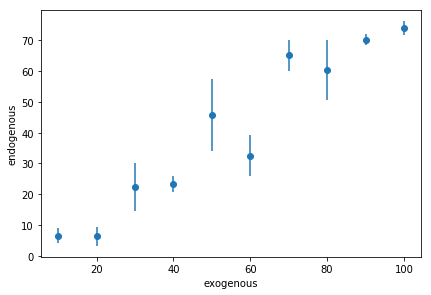

In [7]:
fig = pl.figure(figsize=(15,10))
ax = fig.add_subplot(221)
ax.scatter(x, y)
e= np.random.randn(len(x)) * errors(x)
ax.errorbar(x, y, yerr=e, fmt='.')
ax.set_xlabel('exogenous')
ax.set_ylabel('endogenous')

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [8]:
import numpy
x2 = sm.add_constant(x)

# 3. use statsmodels.api.OLS to fit x and y

a. the wrong way: by passing x as exogenous variable
b. the right way: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [9]:
# a.the wrong way: by passing x as exogenous variable
smfit = smf.OLS(y, x).fit()
smfit.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python2/lib/python2.7/site-packages/scipy/stats/stats.py:1326: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     395.4
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           9.55e-09
Time:                        10:55:36   Log-Likelihood:                -33.751
No. Observations:                  10   AIC:                             69.50
Df Residuals:                       9   BIC:                             69.80
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.7555      0.038     19.885      0.000         0.670     0.841
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   3.218
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.179
Skew:                           0.175   Prob(JB):                        0.914
Kurtosis:                       2.446   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# b. the right way: by passing statsmodels.api.add_constant(x) as exogenous variable
smfit2 = smf.OLS(y,x2).fit()
smfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     95.94
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           9.91e-06
Time:                        10:55:38   Log-Likelihood:                -33.330
No. Observations:                  10   AIC:                             70.66
Df Residuals:                       8   BIC:                             71.27
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.3425      5.179     -0.839      0.426       -16.285     7.600
x1             0.8175      0.083      9.795      0.000         0.625     1.010
==============================================================================
Omnibus:                        0.101   Durbin-Watson:                   3.511
Prob(Omnibus):                  0.951   Jarque-Bera (JB):                0.158
Skew:                           0.140   Prob(JB):                        0.924
Kurtosis:                       2.451   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Difference: 

# 4. plot the data (as points) and both statsmodels fits

In [14]:
smfit2

In [21]:
x2[:,1]

array([  10.,   20.,   30.,   40.,   50.,   60.,   70.,   80.,   90.,  100.])

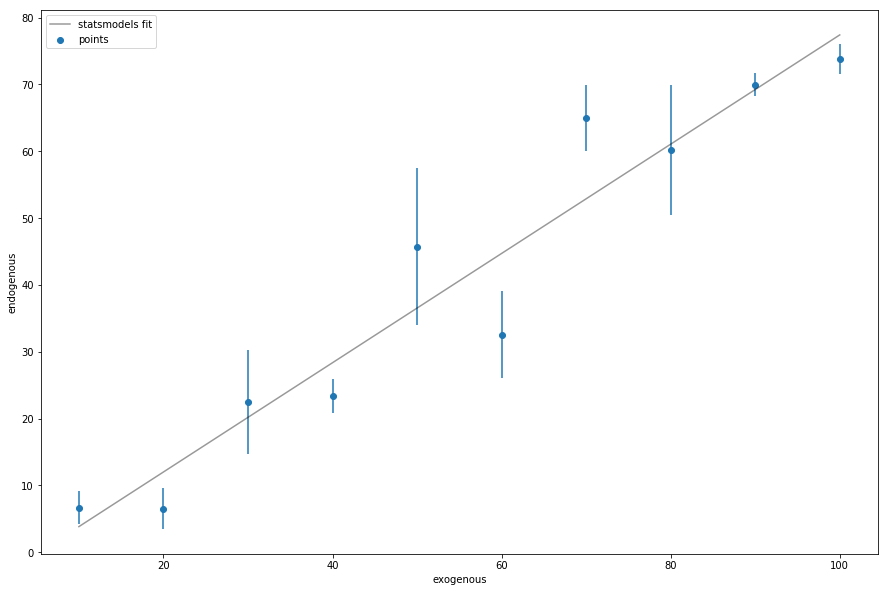

In [28]:
%matplotlib inline
fig2, ax3 = pl.subplots(figsize=(15,10))
#ax3 = fig.add_subplot(221)
ax3.scatter(x, y,label = "points")
e3= np.random.randn(len(x)) * errors(x)
ax3.errorbar(x, y, yerr=e, fmt='.')
ax3.set_xlabel('exogenous')
ax3.set_ylabel('endogenous')
ax3.plot(x2[:,1], smfit2.fittedvalues, 'k', alpha=0.4, label = "statsmodels fit")
ax3.legend()

In [17]:
smfit2.fittedvalues

array([  3.83272224,  12.00794942,  20.18317661,  28.35840379,
        36.53363097,  44.70885815,  52.88408533,  61.05931251,
        69.23453969,  77.40976688])

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

In [34]:
x3 = np.linspace(10,100,10)
y3 = line(0.7, x3, b=120, errors=errors)

In [37]:
%matplotlib inline
fig2 = pl.figure(figsize=(15,10))
ax2 = fig.add_subplot(221)
ax2.scatter(x3, y3)
e2= np.random.randn(len(x3)) * errors(x3)
ax2.errorbar(x3, y3, yerr=e2, fmt='.')
ax2.set_xlabel('exogenous')
ax2.set_ylabel('endogenous')

# 6. repeat step 3

In [38]:
# a.the wrong way: by passing x as exogenous variable
smfit2 = smf.OLS(y3, x3).fit()
smfit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     65.00
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           2.08e-05
Time:                        22:32:56   Log-Likelihood:                -54.243
No. Observations:                  10   AIC:                             110.5
Df Residuals:                       9   BIC:                             110.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.3775      0.295      8.062      0.000         1.710     3.045
==============================================================================
Omnibus:                        1.150   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                0.674
Skew:                           0.106   Prob(JB):                        0.714
Kurtosis:                       1.746   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x4 = sm.add_constant(x)

In [41]:
# b. the right way: by passing statsmodels.api.add_constant(x) as exogenous variable
smfit3 = smf.OLS(y3,x4).fit()
smfit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     82.03
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.77e-05
Time:                        22:34:00   Log-Likelihood:                -32.481
No. Observations:                  10   AIC:                             68.96
Df Residuals:                       8   BIC:                             69.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        117.8190      4.757     24.766      0.000       106.849   128.789
x1             0.6944      0.077      9.057      0.000         0.518     0.871
==============================================================================
Omnibus:                       16.239   Durbin-Watson:                   2.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.653
Skew:                          -1.931   Prob(JB):                       0.0132
Kurtosis:                       5.419   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the inverse (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [48]:
w = numpy.std(errors(y))#w is the standard deviation of the error
smfitw = smf.WLS(y3, x4,weights=1./(w ** 2)).fit()
smfitw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.911
Model:                            WLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     82.03
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           1.77e-05
Time:                        22:36:41   Log-Likelihood:                -32.481
No. Observations:                  10   AIC:                             68.96
Df Residuals:                       8   BIC:                             69.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        117.8190      4.757     24.766      0.000       106.849   128.789
x1             0.6944      0.077      9.057      0.000         0.518     0.871
==============================================================================
Omnibus:                       16.239   Durbin-Watson:                   2.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.653
Skew:                          -1.931   Prob(JB):                       0.0132
Kurtosis:                       5.419   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation

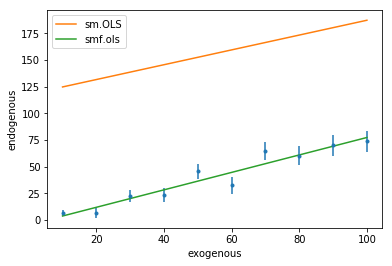

In [52]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit3.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();